# Exploring the public CHTS data

Sam Maurer, June 2017

Python 3.6

In [32]:
%matplotlib inline

import matplotlib
import pandas as pd
import zipfile

In [4]:
# See ../data/README.md for instructions about how to get the data

z = zipfile.ZipFile('../data/caltrans_full_survey.zip')

## Households

Households who participated in the travel diary survey

In [73]:
households = pd.read_csv(z.open('caltrans_full_survey/survey_households.csv'), low_memory=False)

len(households)

42426

In [74]:
# Limit to the Bay Area

households_ba = households[households.home_county_id.isin([1, 13, 41, 55, 75, 81, 85, 95, 97])]

len(households_ba)

9715

In [75]:
# Top home locations

households_ba.home_city.value_counts()[:15]

SAN FRANCISCO    1076
SAN JOSE          939
OAKLAND           459
SANTA ROSA        321
BERKELEY          251
NAPA              228
PALO ALTO         218
SUNNYVALE         200
SAN MATEO         197
FREMONT           177
WALNUT CREEK      173
REDWOOD CITY      170
FAIRFIELD         159
CONCORD           158
SAN RAFAEL        158
Name: home_city, dtype: int64

## Persons

In [80]:
persons = pd.read_csv(z.open('caltrans_full_survey/survey_person.csv'), low_memory=False)

len(persons)

109113

In [84]:
persons[['sampno', 'perno', 'travel_date', 'gender', 'relation', 'education', 'race1']].head(10)

,sampno,perno,travel_date,gender,relation,education,race1
0,7128119,1,2013-01-27,1,1,6,1.0
1,7128119,3,2013-01-27,2,3,1,1.0
2,7128138,1,2012-11-05,2,1,5,1.0
3,7128262,1,2012-12-21,2,1,1,1.0
4,7128262,3,2012-12-21,2,3,2,1.0
5,7128262,2,2012-12-21,1,2,1,1.0
6,7128288,2,2013-01-22,1,3,3,1.0
7,7128288,1,2013-01-22,2,1,5,1.0
8,7128316,1,2012-12-29,2,1,4,1.0
9,7128372,1,2012-12-29,2,1,6,1.0


In [85]:
# What is `person_trips`? -- not sure, but it looks related to the `tripno` field

persons.person_trips.describe()

count    108776.000000
mean          3.233838
std           2.954577
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          33.000000
Name: person_trips, dtype: float64

## Places

Each record represents a single visit to a place

In [53]:
places = pd.read_csv(z.open('caltrans_full_survey/survey_place.csv'), low_memory=False)

len(places)

460524

In [54]:
# TO DO -- 
# we should probably filter by where people live, not where the activites are located

places_ba = places[places.county_id.isin([1, 13, 41, 55, 75, 81, 85, 95, 97])]

len(places_ba)

118271

In [62]:
# Is there a unique identifier?

# Might need to use combination of `sampno` (household), `perno` (person within hh),
# `plano` (place within person's travel diary)

# What's `tripno`? ("unlinked trip ID" - maybe representing transfer between modes)

places_ba[['sampno', 'perno', 'plano', 'tripno']].head(10)

,sampno,perno,plano,tripno
0,1031985,1,1,NaN
1,1031985,1,2,1.0
2,1031985,1,3,2.0
3,1031985,2,1,NaN
4,1031985,2,2,1.0
5,1031985,2,3,2.0
105,1033586,1,2,1.0
106,1033586,1,3,2.0
107,1033586,1,4,3.0
108,1033586,1,5,4.0


In [78]:
# Is every combination of `sampno`, `perno`, `plano` unique? -- Yes

len(places_ba.groupby(['sampno', 'perno', 'plano']))

118271


In [76]:
# How many places have a `tripno`? -- about 80%

places_ba.tripno.count()

94646


In [77]:
# Is the `tripno` ever repeated? -- No

len(places_ba.groupby(['sampno', 'perno', 'plano', 'tripno']))

118271

In [79]:
places_ba.tripno.describe()

count    94646.000000
mean         3.812079
std          2.844767
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         32.000000
Name: tripno, dtype: float64

In [86]:
# Can we see the place names? -- No

places_ba.place_name.head()

0    REDACTED
1    REDACTED
2    REDACTED
3    REDACTED
4    REDACTED
Name: place_name, dtype: object

In [55]:
places_ba.city.value_counts()[:15]

SAN FRANCISCO    16377
SAN JOSE         11877
OAKLAND           5649
SANTA ROSA        3522
BERKELEY          3267
PALO ALTO         2754
SUNNYVALE         2493
SAN MATEO         2240
NAPA              2240
FREMONT           2170
REDWOOD CITY      2100
MOUNTAIN VIEW     1990
WALNUT CREEK      1925
SANTA CLARA       1921
CONCORD           1826
Name: city, dtype: int64

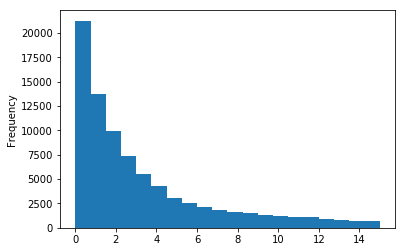

In [56]:
places_ba.trip_distance_miles.plot.hist(bins=20, range=(0,15));

In [57]:
# Most detailed spatial identifier in public data is tract_id

# How many different tracts are visited?
places_ba.tract_id.unique().shape[0]

1711

In [58]:
# How many different households?
places_ba.sampno.unique().shape[0]

10619

In [59]:
# How many different people?
len(places_ba.groupby(['sampno','perno']))

24843

## Activities

"The activity reported is for a single travel day and contains the highest level of detail about the survey participants' travel purpose" (data dictionary)

So, there can be multiple "activities" at each "place" visited as part of a trip.

In [50]:
activities = pd.read_csv(z.open('caltrans_full_survey/survey_activity.csv'), low_memory=False)

len(activities)

604711

In [52]:
activities_ba = activities[activities.county_id.isin([1, 13, 41, 55, 75, 81, 85, 95, 97])]

len(activities_ba)

157011

In [64]:
# What do the identifiers look like? 

activities_ba[['sampno', 'perno', 'plano', 'actno', 'tripno']].head(10)

,sampno,perno,plano,actno,tripno
1,1041766,3,1,1,NaN
4,1051203,1,9,1,8.0
8,1065929,1,1,1,NaN
14,1097949,1,1,1,NaN
22,1124271,1,5,1,4.0
27,1126030,2,1,1,NaN
30,1127449,2,1,1,NaN
32,1127626,1,1,1,NaN
35,1128657,1,1,1,NaN
37,1129482,1,1,1,NaN


In [72]:
# Each place occurs in the activities table at least once

print((activities_ba.actno == 1).sum())  # number of activities with id 1

print(len(activities_ba.groupby(['sampno', 'perno', 'plano'])))  # unique places referenced

print(len(places_ba))  # records in places table

118271
118271
118271


## Trips

What's the correct way to aggregate places into trips?

It seems like each person recorded their travel for a single day as a sequence of places visited, without much explicit thought about trips or tours. So that's up to us to do by applying whatever rules seem appropriate. 

Probably it's not even possible to identify tours with certainty from the anonymized data, because the place names and precise locations are redacted.

In [ ]:
# TO DO

# - check that the first "place" looks like the home location, w/o travel time or distance
# - figure out how trips involving a transfer or mode switching are recorded (to avoid 
#   sampling intermediate locations; to make sure data on mode alternatives is clean)

# - for purposes of modeling, could begin by randomly sampling secondary destinations

# - ask Timothy how he dealt with this, at some point?

In [ ]:
# TO DO

# - set up destination choice model
# - make two tables: (1) trips, (2) destinations
# - write a function to generate choice set

# - for covariates, calculate home/work/etc density endogenously

# - can probably generate average travel time between tracts, by mode
# - then can use that to build a mode choice model

# - set up a data prep notebook that runs before the estimation one

# - make a table of estimation use cases and which packages cover them